# What is this notebook about?

This notebook will be under ongoing work as more dataset will be combined to create more unique insights to answer more questions. The "Final Duns" data set is about a list of instutions who get funding from IES(grant info not yet there) along with other interesting features such as DUNS, location variables, and IPEDs. 

The "notes" column gives more information on the instution such as its size, ethnicity, and gender of the individuals in that institution. This allows us to answer questions such as:

- Which instutions are getting funding and how much?
- Are we providing funding to a diverse collection of institutions?
- What's happening once the grants are received?

----

# Importing Libraries

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
duns = pd.read_excel("Final Duns.xlsx")
duns

,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1st Playable Productions,787314058,NaN,Woman owned,NY,NaN,NaN,12180,NaN,NaN,NaN,
1,21st Century Partnership for STEM Education,807179697,NaN,NaN,PA,NaN,NaN,19428,NaN,NaN,NaN,NaN
2,3-C Institute for Social Development,46981549,NaN,Woman owned,NC,NaN,NaN,27713,NaN,NaN,NaN,NaN
3,AbleLink Technologies,008546678,NaN,HUBZone Owned,CO,NaN,NaN,80923,NaN,NaN,NaN,NaN
4,"Abt Associates, Inc.",43397520,NaN,NaN,MA,NaN,NaN,02138,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
511,Wyoming Department of Education,809872336,NaN,NaN,WY,NaN,NaN,82001,NaN,NaN,NaN,NaN
512,Yale University,43207562,NaN,NaN,CT,142600.0,130794.0,06511,NaN,NaN,NaN,NaN
513,Zaption,079279749,NaN,no special status,CA,NaN,NaN,91360,NaN,NaN,NaN,NaN
514,Zuni Learning Tree,080494814,NaN,Woman owned,AR,NaN,NaN,72034,NaN,NaN,NaN,NaN


In [4]:
hd2019 = pd.read_excel("hd2019.xlsx")

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [11]:
# merging both duns and hd2019 datasets
df = pd.merge(duns, hd2019)
df = df.rename(columns = {"LONGITUD":"Longitude", "LATITUDE":"Latitude"})
df

,Institution name,DUNS,AlternateDUNS,notes,State,OPE,IPEDs,ZIP,Unnamed: 8,Unnamed: 9,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,Longitude,Latitude,DFRCGID,DFRCUSCG
0,Boise State University,72995848,NaN,NaN,ID,161600.0,142115.0,83725,NaN,NaN,...,1,147,-2,16001,Ada County,1602,-116.203301,43.604284,100,1
1,Clemson University,42629816,NaN,NaN,SC,342500.0,217882.0,29634,NaN,NaN,...,1,273,-2,45077,Pickens County,4503,-82.835114,34.679381,98,1
2,DePaul University,45694130,NaN,NaN,IL,NaN,144740.0,60604,NaN,NaN,...,1,176,-2,17031,Cook County,1707,-87.627240,41.877618,103,1
3,Duke University,44387793,NaN,NaN,NC,NaN,198419.0,27708,NaN,NaN,...,1,450,-2,37063,Durham County,3701,-78.937624,36.001135,99,2
4,Emory University,66469933,NaN,NaN,GA,156400.0,139658.0,30322,NaN,NaN,...,1,122,-2,13089,DeKalb County,1305,-84.325512,33.790183,99,1
5,Florida International University,71298814,NaN,NaN,FL,963500.0,133951.0,33199,NaN,NaN,...,1,370,-2,12086,Miami-Dade County,1226,-80.373928,25.757320,96,1
6,Fordham University,71011019,NaN,NaN,NY,272200.0,191241.0,10458,NaN,NaN,...,1,408,-2,36005,Bronx County,3615,-73.882705,40.859354,103,1
7,Idaho State University,78341468,NaN,NaN,ID,162000.0,142276.0,83209,NaN,NaN,...,1,-2,-2,16005,Bannock County,1602,-112.432312,42.863832,102,1
8,Middle Tennessee State University,77648780,NaN,NaN,TN,351000.0,220978.0,37132,NaN,NaN,...,1,400,-2,47149,Rutherford County,4704,-86.360618,35.848005,104,1
9,Mills College,73929002,NaN,NaN,CA,123800.0,118888.0,94613,NaN,NaN,...,1,488,-2,6001,Alameda County,613,-122.182294,37.781425,125,1


In [12]:
#shape of data set
print(df.shape)

#focusing on a few columns via filtering this dataset
df1 = df[["Institution name","DUNS","State","ZIP","notes","OPE","IPEDs", "Longitude", "Latitude"]]
df1


(42, 83)


,Institution name,DUNS,State,ZIP,notes,OPE,IPEDs,Longitude,Latitude
0,Boise State University,72995848,ID,83725,NaN,161600.0,142115.0,-116.203301,43.604284
1,Clemson University,42629816,SC,29634,NaN,342500.0,217882.0,-82.835114,34.679381
2,DePaul University,45694130,IL,60604,NaN,NaN,144740.0,-87.627240,41.877618
3,Duke University,44387793,NC,27708,NaN,NaN,198419.0,-78.937624,36.001135
4,Emory University,66469933,GA,30322,NaN,156400.0,139658.0,-84.325512,33.790183
5,Florida International University,71298814,FL,33199,NaN,963500.0,133951.0,-80.373928,25.757320
6,Fordham University,71011019,NY,10458,NaN,272200.0,191241.0,-73.882705,40.859354
7,Idaho State University,78341468,ID,83209,NaN,162000.0,142276.0,-112.432312,42.863832
8,Middle Tennessee State University,77648780,TN,37132,NaN,351000.0,220978.0,-86.360618,35.848005
9,Mills College,73929002,CA,94613,NaN,123800.0,118888.0,-122.182294,37.781425


Up to this point in our data transformation, I have merged our 'hd2019' dataset and 'duns' dataset to create an inner join of all the data in both of these files. 

An inner join file has data that both of the files contain, you might be wondering why I did this? Since 'hd2019' and 'duns' have a lot of 'NaN'(aka NULL values) its hard to work around that. 

I'm using this inner join to experiment with a small sample and then I can simply change the type of merge for the whole table when needed.

# Visualizing the institution data

Now that we got our merged data, it's time to visualize it.

I've decided to create a map since it's the most usefule when it comes to visualizing longitude and latitude data. This is also a good oppurtunity to see which part of the United States receive funding

NOTE: the merged data only contains 41 institutions, I'll be doing a full analysis once I can ensure that the visualization works

In [18]:
import descartes
import geopandas as gpd
'''
If you can't install geopandas via pip try these commands first:
$ pip install gevent --pre
$ pip install auto-py-to-exe

if you install Anaconda you can skip the previous step and just use the command below
then use 'pip install geopandas'
'''
from shapely.geometry import Point, Polygon

<AxesSubplot:>

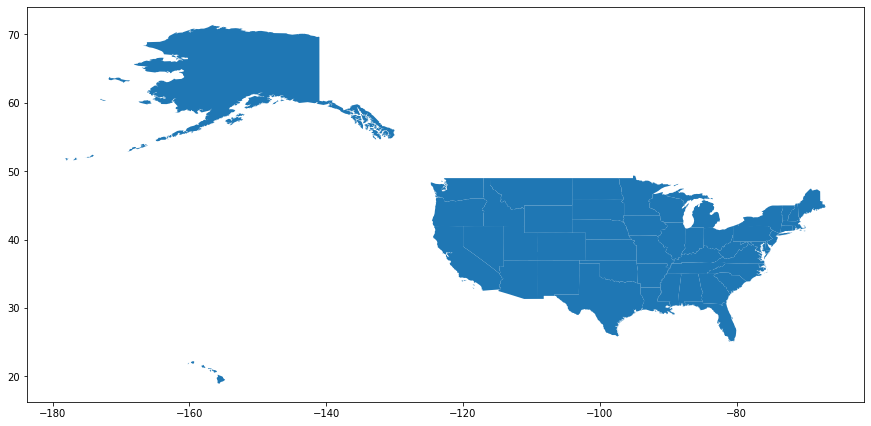

In [31]:
map = gpd.read_file("states.shp")
fig,ax = plt.subplots(figsize = (15, 15))
map.plot(ax = ax)


In [37]:
geometry = [Point(xy) for xy in zip(df1["Longitude"], df1["Latitude"])]
geometry[:3]

In [38]:
geodf = gpd.GeoDataFrame(df1, geometry = geometry)
geodf.head()


,Institution name,DUNS,State,ZIP,notes,OPE,IPEDs,Longitude,Latitude,geometry
0,Boise State University,72995848,ID,83725,NaN,161600.0,142115.0,-116.203301,43.604284,POINT (-116.20330 43.60428)
1,Clemson University,42629816,SC,29634,NaN,342500.0,217882.0,-82.835114,34.679381,POINT (-82.83511 34.67938)
2,DePaul University,45694130,IL,60604,NaN,NaN,144740.0,-87.627240,41.877618,POINT (-87.62724 41.87762)
3,Duke University,44387793,NC,27708,NaN,NaN,198419.0,-78.937624,36.001135,POINT (-78.93762 36.00113)
4,Emory University,66469933,GA,30322,NaN,156400.0,139658.0,-84.325512,33.790183,POINT (-84.32551 33.79018)


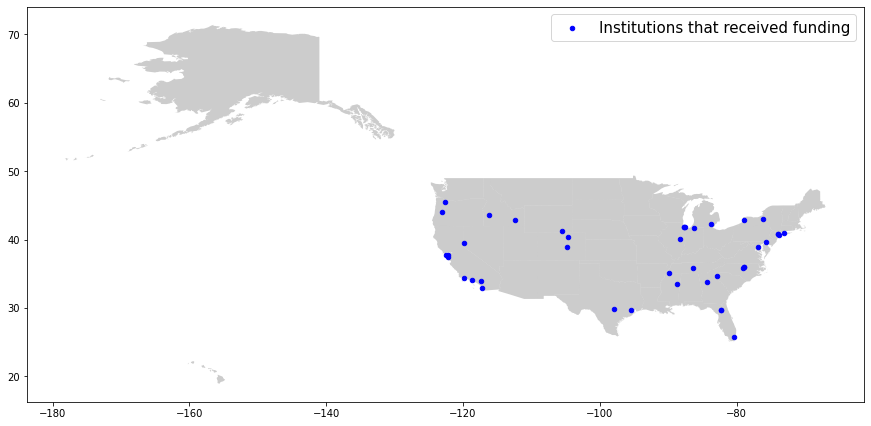

In [40]:
fig,ax = plt.subplots(figsize = (15, 15))
map.plot(ax = ax, alpha = 0.4, color = "grey")
geodf.plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Institutions that received funding")
plt.legend(prop={'size':15})